In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

---


Before starting, you must click on the "Copy To Drive" option in the top bar. Go to File --> Save a Copy to Drive. Name it *'LastName_FirstName_T1.5.ipynb'*. <ins>This is the master notebook so you will not be able to save your changes without copying it !</ins> Once you click on that, make sure you are working on that version of the notebook so that your work is saved.



---


### In this Colab we'll explore a more advanced Image Dataset - Horses vs. Humans. We’ll start by downloading and organizing the image database using Image Generators. We’ll then train a model with and without Image Augmentation and then finally evaluate our model by uploading a horse or human image and see if the model can classify it correctly. In the end, we’ll visualize the model layers.

# 1. Binary Classification

We are trying to classify between two different classes - horses or humans - therefore, making this a Binary Classification task!

Unlike in the previous tutorials where we had imported all necessary libraries in the beginning, here we will import them when required (in the required cell). This way we'd see the immediate use of the imported library.

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


We import:
1. [tensorflow](https://www.tensorflow.org/) - open source library to develop and train ML models

In [ ]:
import tensorflow as tf

### Download the Dataset into our Colab Notebook




We download the zip files for the training dataset (*train-horse-or-human.zip*) and validation dataset (*validation-horse-or-human.zip*). The links to these datasets - [train_dataset](https://drive.google.com/uc?id=1hJVjhXUNTs0GQP0MHH__sliYSkfEHgXE) and [validation_dataset](https://drive.google.com/uc?id=1tjXOTk_Ha1J7YqANFLYrw1ldb1IuOPr_).

You can find these two .zip files on the left i.e., in your content/ folder after running the below cell.










In [ ]:
!pip install --upgrade --no-cache-dir gdown

# download train set
!gdown --id 1hJVjhXUNTs0GQP0MHH__sliYSkfEHgXE

# download validation set
!gdown --id 1tjXOTk_Ha1J7YqANFLYrw1ldb1IuOPr_

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1hJVjhXUNTs0GQP0MHH__sliYSkfEHgXE
From (redirected): https://drive.google.com/uc?id=1hJVjhXUNTs0GQP0MHH__sliYSkfEHgXE&confirm=t&uuid=33a8d8e1-e54b-4fa1-a653-1c95003bbf9d
To: /content/train-horse-or-human.zip
100% 150M/150M [00:02<00:00, 54.4MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1tjXOTk_Ha1J7YqANFLYrw1ldb1IuOPr_
To: /content/validation-

We unzip the .zip files into two directories - one for training, one for validation. These directories further contain a subdirectory each for horses and humans. These folders can be found in the tab to the left.

We import the following libraries:


1.   [os](https://docs.python.org/3/library/os.html) - perform operating system related tasks
2.   [zipfile](https://docs.python.org/3/library/zipfile.html) - tools to manipulate zip files



In [ ]:
import os
import zipfile

# training dataset
local_zip = '/content/train-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/train-horse-or-human')

# validation dataset
local_zip = '/content/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/validation-horse-or-human')

zip_ref.close()

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/content/train-horse-or-human/horses')
# Directory with our training human pictures
train_human_dir = os.path.join('/content/train-horse-or-human/humans')
# Directory with our training horse pictures
validation_horse_dir = os.path.join('/content/validation-horse-or-human/horses')
# Directory with our training human pictures
validation_human_dir = os.path.join('/content/validation-horse-or-human/humans')

train_horse_names = os.listdir('/content/train-horse-or-human/horses')
print(train_horse_names[:10])
train_human_names = os.listdir('/content/train-horse-or-human/humans')
print(train_human_names[:10])
validation_horse_hames = os.listdir('/content/validation-horse-or-human/horses')
print(validation_horse_hames[:10])
validation_human_names = os.listdir('/content/validation-horse-or-human/humans')
print(validation_human_names[:10])

['horse29-9.png', 'horse13-9.png', 'horse47-3.png', 'horse32-7.png', 'horse44-7.png', 'horse15-7.png', 'horse15-5.png', 'horse09-7.png', 'horse44-2.png', 'horse27-6.png']
['human08-18.png', 'human03-10.png', 'human16-13.png', 'human16-22.png', 'human12-21.png', 'human04-01.png', 'human04-11.png', 'human16-15.png', 'human03-11.png', 'human05-08.png']
['horse5-002.png', 'horse1-276.png', 'horse1-436.png', 'horse3-026.png', 'horse5-565.png', 'horse1-411.png', 'horse5-342.png', 'horse6-544.png', 'horse3-469.png', 'horse3-584.png']
['valhuman02-15.png', 'valhuman02-03.png', 'valhuman04-04.png', 'valhuman04-08.png', 'valhuman01-02.png', 'valhuman05-19.png', 'valhuman01-15.png', 'valhuman01-00.png', 'valhuman03-09.png', 'valhuman05-10.png']


---


**Question 1**: What's the best directory structure to store an image dataset for a classification task?

**Answer:** train/horses/horse1.jpg ...
train/humans/human1.jpg ...
test/horses/horse1.jpg ...
test/humans/human1.jpg ...

---

## Display example images

Let's visualize some training examples from each of the two classes.

We import the following -
1.   [matplotlib](https://matplotlib.org/) - visualization of data in Python

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_img(path, file_name):
    image = mpimg.imread(path + file_name)
    plt.imshow(image)
    plt.show()

### Displaying horse images



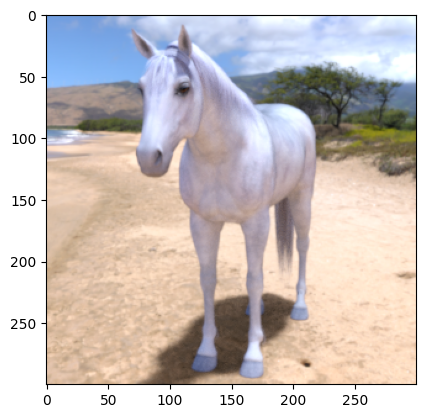

In [ ]:
path = '/content/train-horse-or-human/horses/'
file_name = 'horse01-0.png'

show_img(path, file_name)

### Displaying human images

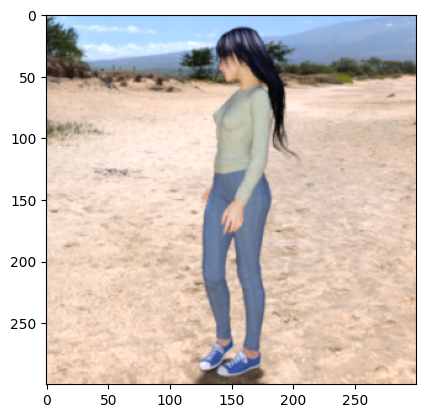

In [ ]:
# < YOUR CODE HERE >
path = '/content/train-horse-or-human/humans/'
file_name = 'human01-00.png'

show_img(path, file_name)

### Define model

We define our model in the below cell which contains 4 convolution + maxpooling layers, followed by dense layers.

We define our **input shape** to be 100 x 100 x 3 (3 channels representing RGB images). 100 x 100 is arbitrarily chosen (we have to ensure that the images fed to the neural network are of this shape - we might have to preprocess the original images to fit these dimensions).

Our **output layer** contains only one neuron which outputs a value from 0 - 1 where '0' represents one class (say 'horses') and '1' represents the the other (say 'humans'). We use the **Sigmoid Activation Function** (A.F) to achieve this form of output. It is a non-linear activation function used for binary classification tasks. Read more about the Sigmoid A.F [here](https://machinelearningmastery.com/a-gentle-introduction-to-sigmoid-function/).

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

---


**Question 2**: How does the output layer activation function vary for Binary and Multi-class Classification tasks?

**Answer:** For binary classification, we use sigmoid function. Output neurons: 1. For multi-class classification tasks softmax function is used. Output neurons: number of classes.

---

Let's look at the model's summary.

In [ ]:
# < YOUR CODE HERE >
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

In the below cell, we define the optimizer, loss function and metric!

We import the following:
1. RMSprop from [tensorflow.keras.optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) - built-in optimizer classes

Since there are only two classes, we use the ***binary cross entropy*** loss (as opposed to categorical cross entropy loss while classifying the MNIST dataset). Read more about binary cross entropy [here](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a).

We use a different optimizer here - ***RMSprop*** - an adaptive learning based optimizer!

In [ ]:
from tensorflow.keras.optimizers import RMSprop
OPT = RMSprop(lr=0.0001)
LOSS = 'binary_crossentropy'
model.compile(loss=LOSS,
              optimizer=OPT,
              metrics=['acc'])

### Organize your data into Generators

We import the following:
1. ImageDataGenerator from [tensorflow.keras.preprocessing.image](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) - Utilies for image preprocessing and augmentation.

We use the `ImageDataGenerator()` class function to augment images during training. The `flow_from_directory()` API takes a batch of training images from the specified path and applies random transformations to each image in the batch. Then, the Machine Learning model is trained on this transformed batch.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# TRAINING
# All images will be augmented according to whichever lines are uncommented below.
# we can first try without any of the augmentation beyond the rescaling
train_datagen = ImageDataGenerator(
      rescale=1./255,
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True,
      #fill_mode='nearest'
      )

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/train-horse-or-human/',  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 100x100
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


# VALIDATION
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        '/content/validation-horse-or-human',
        target_size=(100, 100),
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


---


**Question 3**: What is the purpose of Image Generators?

**Answer:** It's needed for data augmentation.

---

### Train your model
We now train our model. This may take a little while. Remember we are now building and training relatively complex computer vision models!

The `model.fit()` API returns a history object whose history.history attribute is a record of training loss values and metrics values at successive epochs. You can read more about the API [here](https://www.tensorflow.org/api_docs/python/tf/keras/Model).

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=100,
      verbose=1,
      validation_data=validation_generator)

Epoch 1/100
8/8 [==============================] - 18s 761ms/step - loss: 0.7125 - acc: 0.5172 - val_loss: 0.6829 - val_acc: 0.8672
Epoch 2/100
8/8 [==============================] - 6s 719ms/step - loss: 0.6850 - acc: 0.5984 - val_loss: 0.6244 - val_acc: 0.8516
Epoch 3/100
8/8 [==============================] - 7s 839ms/step - loss: 0.7515 - acc: 0.7130 - val_loss: 0.6888 - val_acc: 0.8555
Epoch 4/100
8/8 [==============================] - 6s 765ms/step - loss: 0.6914 - acc: 0.6073 - val_loss: 0.6831 - val_acc: 0.5000
Epoch 5/100
8/8 [==============================] - 6s 750ms/step - loss: 0.6714 - acc: 0.6229 - val_loss: 0.6351 - val_acc: 0.5000
Epoch 6/100
8/8 [==============================] - 6s 811ms/step - loss: 0.6250 - acc: 0.7141 - val_loss: 0.5608 - val_acc: 0.7539
Epoch 7/100
8/8 [==============================] - 6s 819ms/step - loss: 0.4584 - acc: 0.8543 - val_loss: 3.8427 - val_acc: 0.5273
Epoch 8/100
8/8 [==============================] - 6s 715ms/step - loss: 0.5465 - 

### Run your Model

We import the following:
1. [numpy](https://numpy.org/) - scientific computing in Python
2. files from [google.colab](https://colab.research.google.com/notebooks/io.ipynb) - loading and saving data from external sources.
3. image from [keras.preprocessing](https://keras.io/api/preprocessing/) - Keras preprocessing utilities

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human. **Was the model correct? Try a couple more images and see if you can confuse it!**

In [ ]:
import numpy as np
from google.colab import files
# from keras.preprocessing import image
import keras.utils as image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(100, 100))
  x = image.img_to_array(img)
  x = x / 255.0
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  print()
  if classes[0]>0.5:
    print(fn + " is a human!")
  else:
    print(fn + " is a horse!")


Saving download.jpg to download.jpg
1/1 [==============================] - 0s 19ms/step
[[1.0545902e-07]]
[1.0545902e-07]

download.jpg is a horse!


### Finally lets visualize all of the model layers!

We import the following:
1. [matplotlib](https://matplotlib.org/) - visualization of data in Python
2. [random](https://docs.python.org/3/library/random.html) - pseudo-random number generation for various distributions

Let's define a new Model that will take an image as input, and will output
intermediate representations for all layers in the previous model after the first. We see the resolution of the images become lesser as we go deeper in the network.

1/1 [==============================] - 0s 215ms/step


<ipython-input-17-ae79d397d60e>:48: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


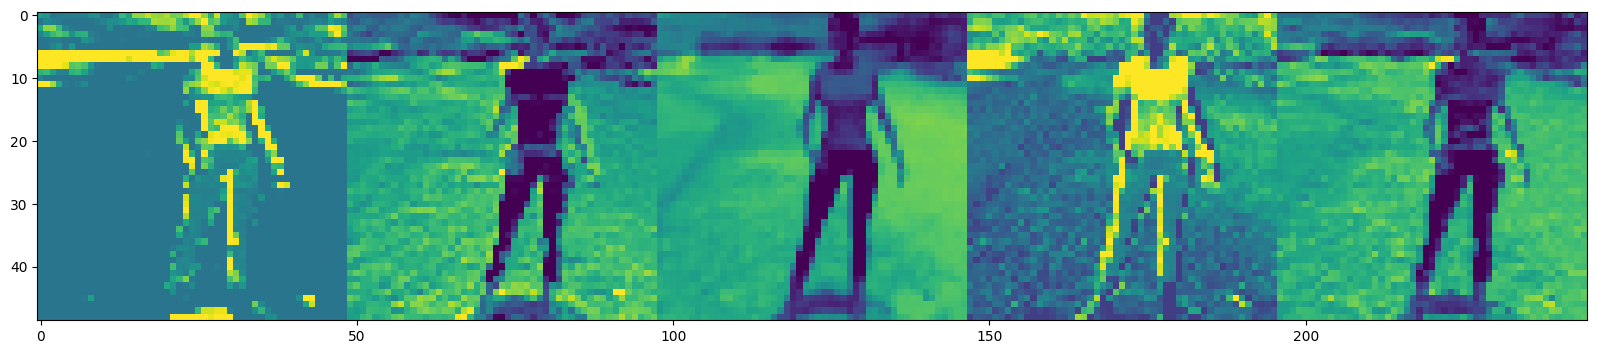

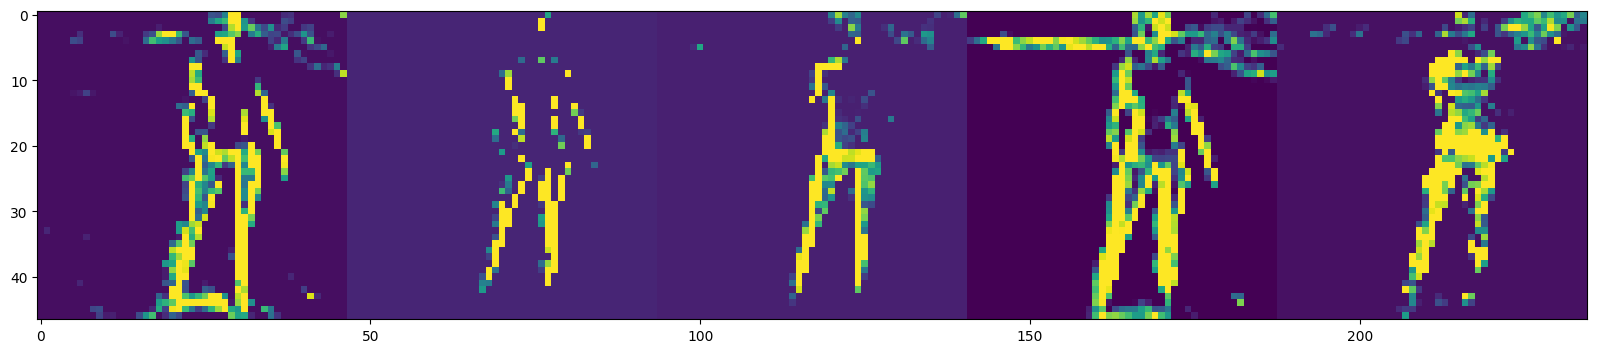

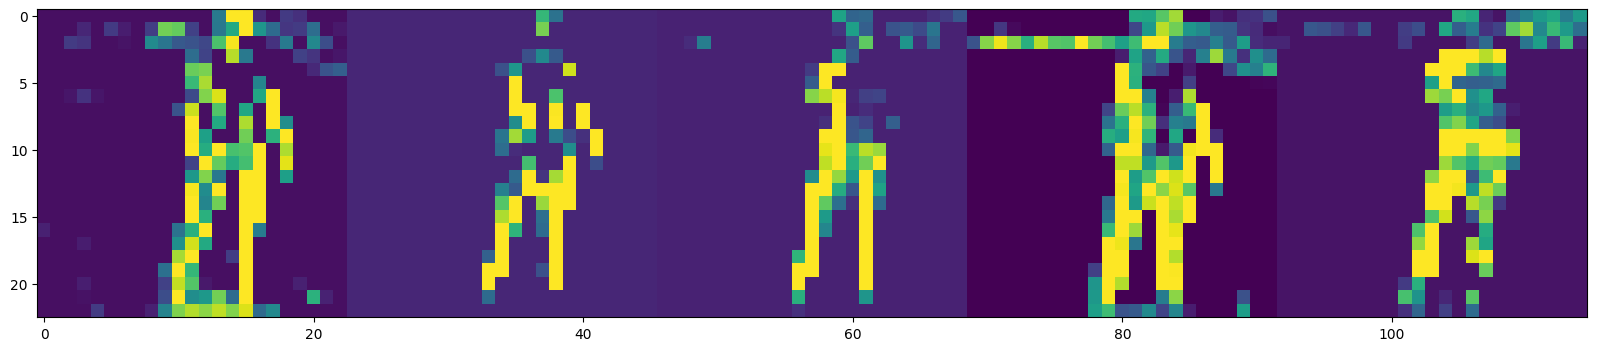

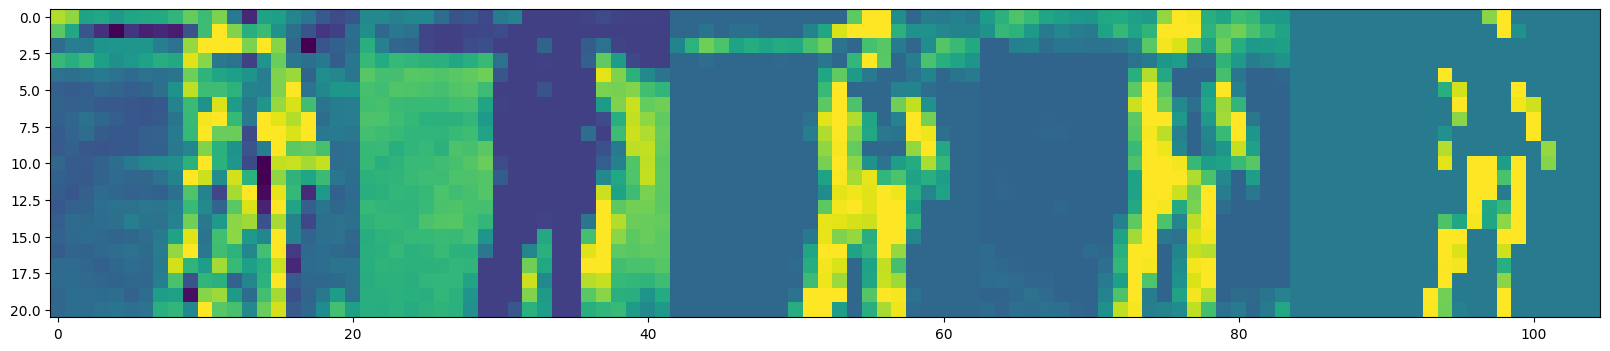

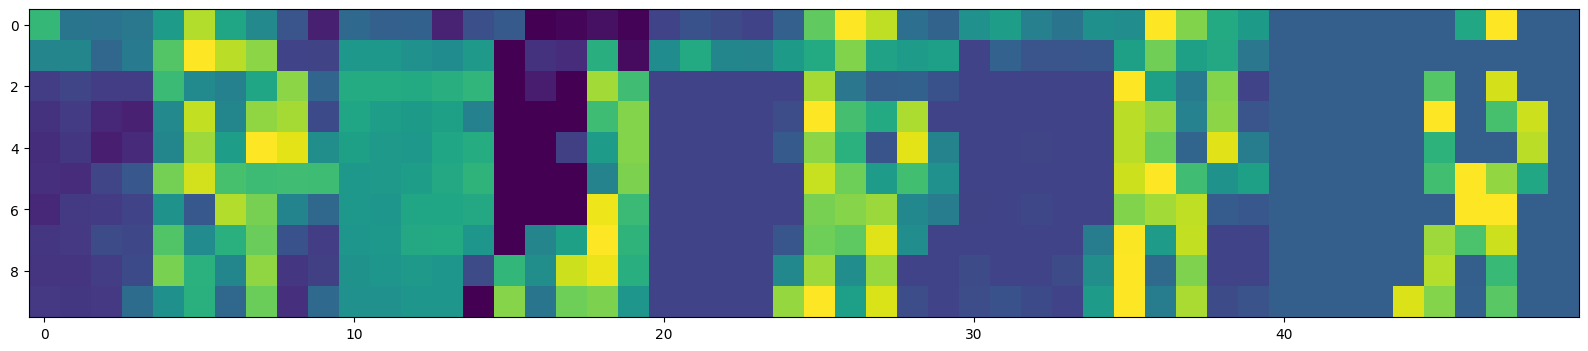

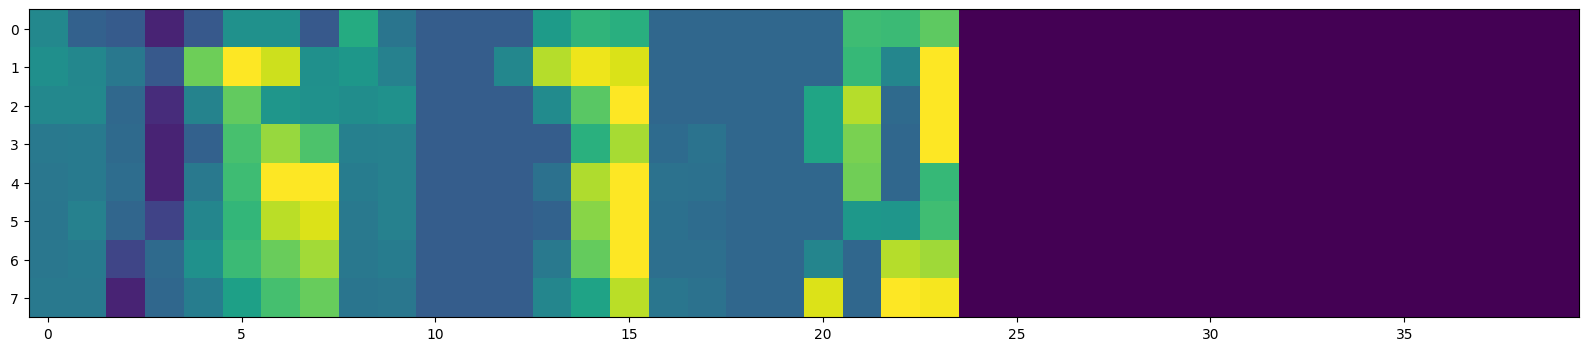

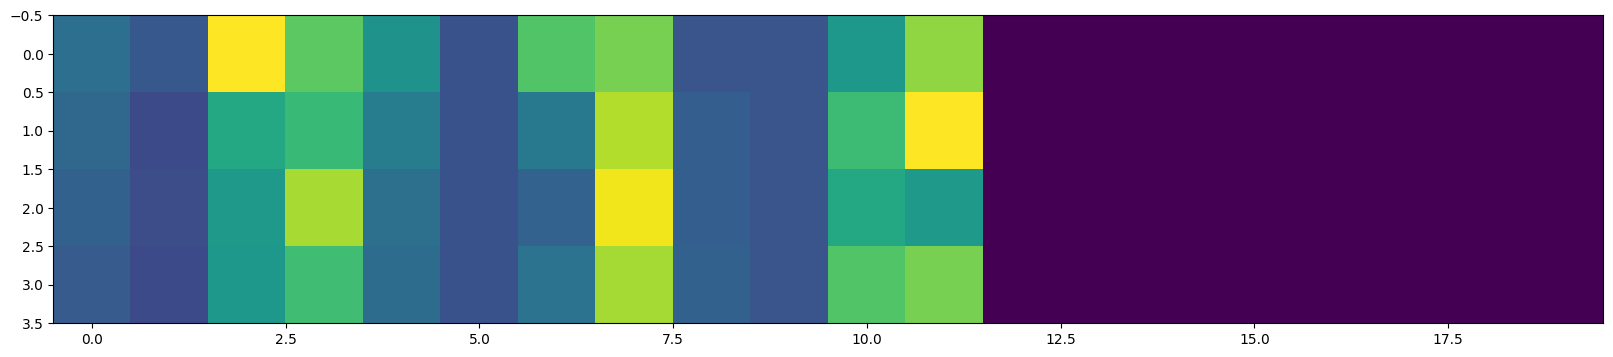

In [ ]:
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
# uncomment the following line if you want to pick the Xth human file manually
img_path = human_img_files[0]

img = load_img(img_path, target_size=(100, 100))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (100, 100, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 100, 100, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    n_features = min(n_features,5) # limit to 5 features for easier viewing
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    # plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')



---



# 2.Binary Classification with Image Augmentation

Now, we’ll again explore the horses v. humans dataset. This time, however, we will train with all forms of data augmentation turned on. You’ll see how this generates quite a bit more data (which takes longer to train) but produces a much more generalizable model since we are avoiding overfitting. You’ll get to test this by again having the chance to upload your own horse or human image and see if the model can detect it correctly. Finally you’ll again get to visualize the model layers.

**Note:** Since we are training on a very limited dataset, with a very small model, the final model does make a decent amount of mistakes. You'll find that if you test with images that look closer to the training dataset it will work much better. This is because while we are avoiding some overfitting with data augmentation, all machine learning models will struggle to generalize far beyond the training dataset!

---


**Question 4**: How does Image Augmentation help w.r.t overfitting?

**Answer:**  Image augmentation increases the effective size and diversity of the training dataset, acting as a form of regularization, thereby helping to reduce overfitting and improve the model's generalization capability.

---

### Now when we organize the data into Generators note how we use many more kinds of Data Augmentation!

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented with the full list of augmentation techniques below
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/train-horse-or-human/',  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        '/content/validation-horse-or-human',
        target_size=(100, 100),
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Train your model with the new augmented data
Since we now have more data due to the data augmentation this training process will take a bit longer than the last time. However, you'll find that the results are much better!

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=100,
      verbose=1,
      validation_data=validation_generator)

Epoch 1/100
8/8 [==============================] - 9s 1s/step - loss: 0.8756 - acc: 0.7542 - val_loss: 0.9198 - val_acc: 0.8008
Epoch 2/100
8/8 [==============================] - 8s 1s/step - loss: 0.3632 - acc: 0.8535 - val_loss: 1.5198 - val_acc: 0.6602
Epoch 3/100
8/8 [==============================] - 9s 1s/step - loss: 0.2885 - acc: 0.8699 - val_loss: 0.6141 - val_acc: 0.8906
Epoch 4/100
8/8 [==============================] - 9s 1s/step - loss: 0.3860 - acc: 0.8365 - val_loss: 0.8205 - val_acc: 0.8203
Epoch 5/100
8/8 [==============================] - 8s 944ms/step - loss: 0.2669 - acc: 0.8966 - val_loss: 1.2904 - val_acc: 0.7656
Epoch 6/100
8/8 [==============================] - 8s 1s/step - loss: 0.1884 - acc: 0.9326 - val_loss: 0.6336 - val_acc: 0.8633
Epoch 7/100
8/8 [==============================] - 9s 1s/step - loss: 0.2382 - acc: 0.9021 - val_loss: 1.6485 - val_acc: 0.8281
Epoch 8/100
8/8 [==============================] - 9s 1s/step - loss: 0.2775 - acc: 0.9088 - val_loss

---


**Question 5**: What do you observe about the training and validation accuracies when the model is trained with Image Augmentation?

**Answer:** Training accuracy is not 1.0 this time around. Unlike without image augmentation, validation accuracy keeps changing for every epoch.

---

### Let's predict again

Can you confuse it this time? Or did the extra data augmentation help the model generalize? What do you think it was about your confusing examples that are no longer confusing (or what is still confusing)?

In [ ]:
import numpy as np
from google.colab import files
# from keras.preprocessing import image
import keras.utils as image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(100, 100))
  x = image.img_to_array(img)
  x = x / 255.0
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving DO2012H_62e35a902cf11_3600.webp to DO2012H_62e35a902cf11_3600.webp
1/1 [==============================] - 0s 25ms/step
[[0.99999976]]
[0.99999976]
DO2012H_62e35a902cf11_3600.webp is a human


### Finally again lets visualize some of the layers for intuition

1/1 [==============================] - 0s 105ms/step


<ipython-input-23-2d626ae0799a>:49: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


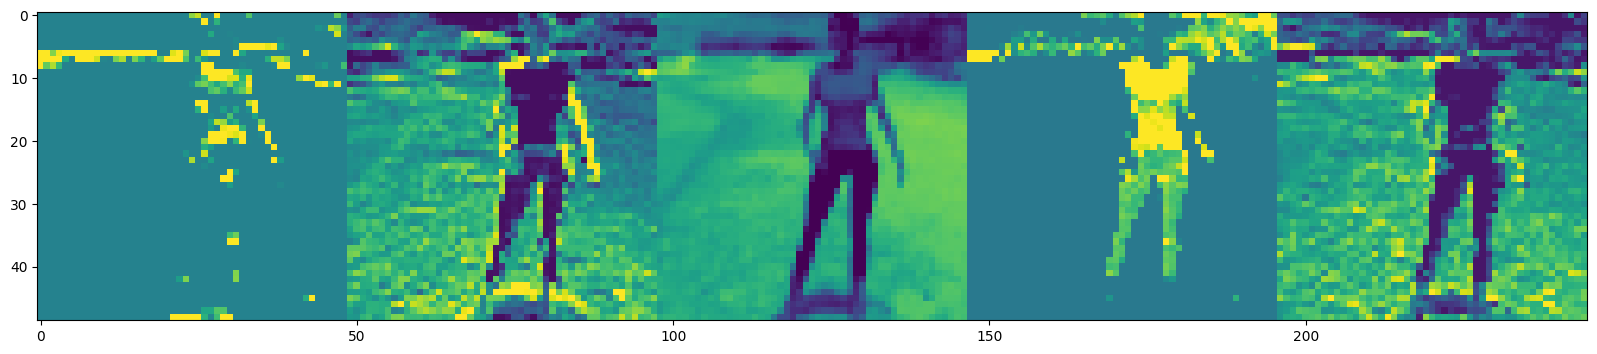

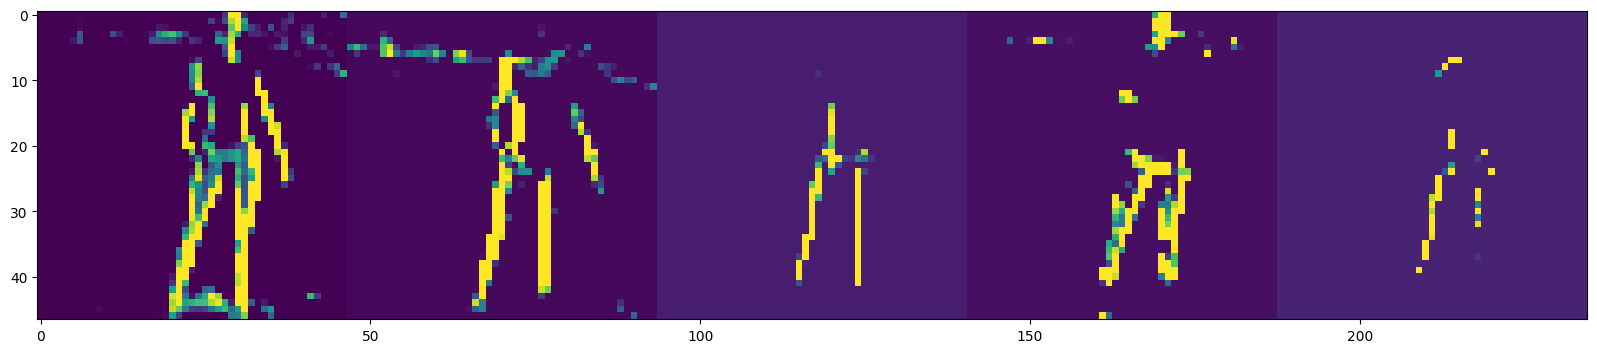

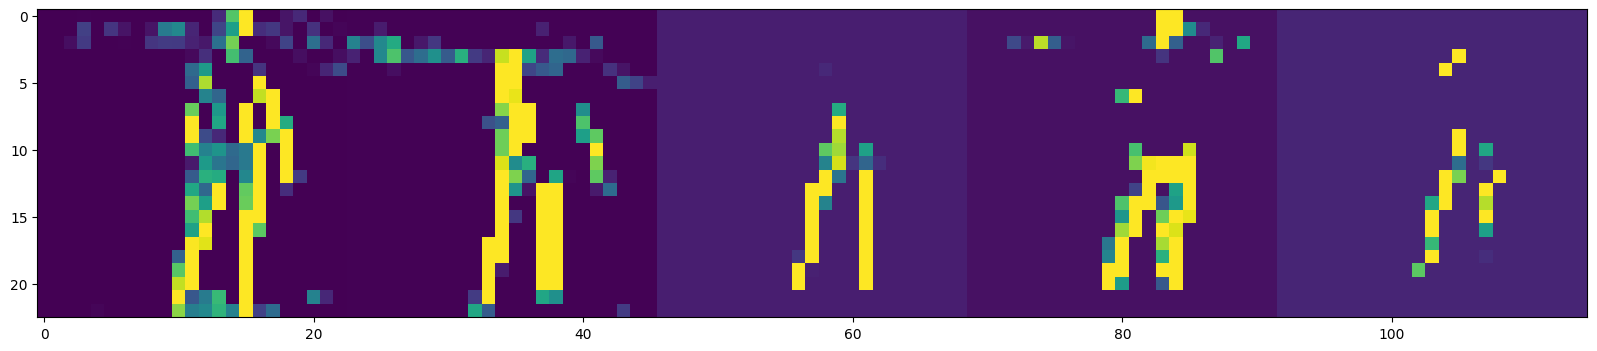

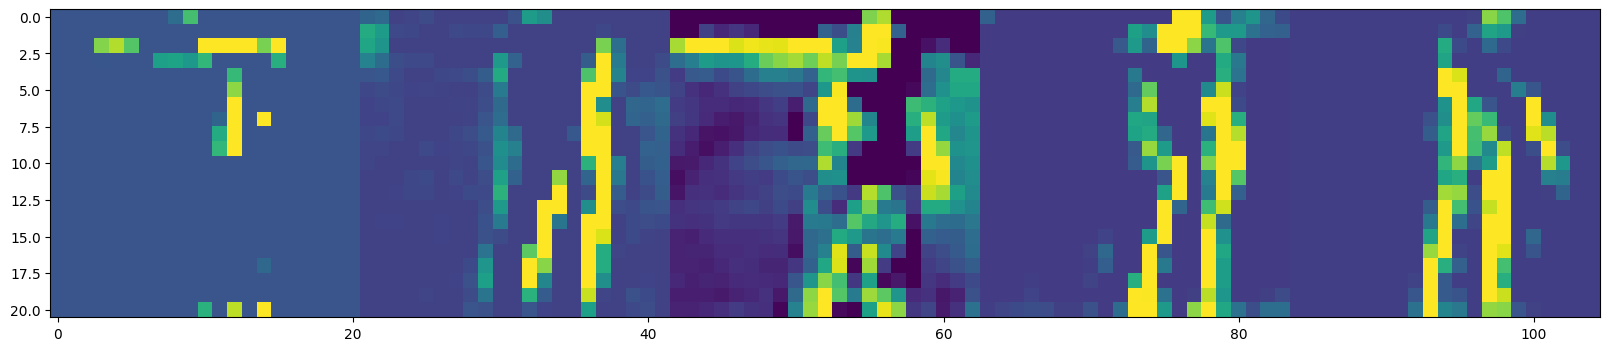

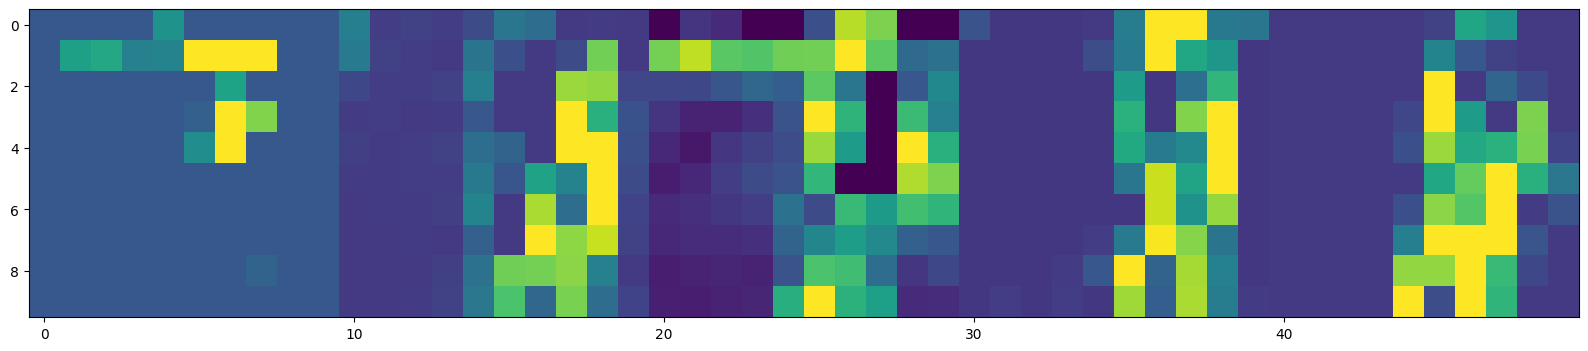

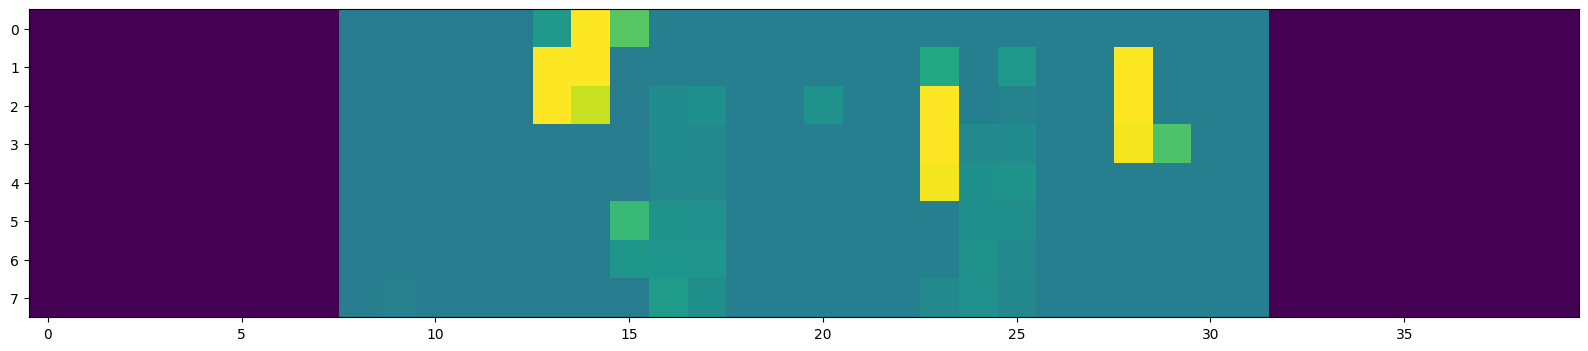

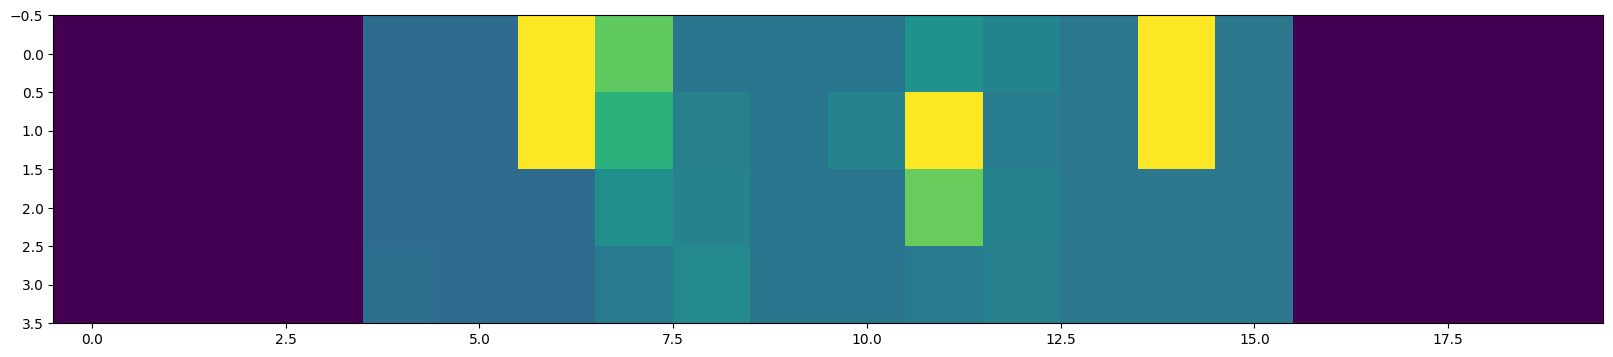

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
# uncomment the following line if you want to pick the Xth human file manually
img_path = human_img_files[0]

img = load_img(img_path, target_size=(100, 100))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (100, 100, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 100, 100, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    n_features = min(n_features,5) # limit to 5 features for easier viewing
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    #plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)